🔥 [Day 5] Classify Handwritten Digits (MNIST)

🎯 Goals Today:

1. Load MNIST dataset
2. Build CNN for image classification
3. Train & evaluate accuracy

📦 1. Load Dataset: torchvision.datasets.MNIST

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform image to tensors & normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# download training and test datasets
train_data = datasets.MNIST(root ='./data', train=True, download=True, transform= transform)
test_data = datasets.MNIST(root ='./data', train=False, download=True, transform= transform)

# Data loader
train_loader = DataLoader(train_data, batch_size=62, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)

100%|██████████| 9.91M/9.91M [00:07<00:00, 1.26MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 123kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 613kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.84MB/s]


🧠 2. Define a Simple CNN Model

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.Conv1 = nn.Conv2d (1, 16, 3, padding=1) # input 1 channel, output : 16, 3x3 kernel
        self.Conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2) # reduce size by e
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10) # 10 digit(0-9)

    def forward(self, X):
        X = self.pool(F.relu(self.Conv1(X))) # 28x28 -> 14x14
        X = self.pool(F.relu(self.Conv2(X))) # 14x14 -> 7x7
        X = X.view(-1, 32 * 7 * 7)
        X = F.relu(self.fc1(X))
        X = self.fc2(X)
        return X

🏋️‍♂️ 3. Train the CNN Model

In [8]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # 5 epochs for now
    running_loss = 0.0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.2069
Epoch 2, Loss: 0.0550
Epoch 3, Loss: 0.0385
Epoch 4, Loss: 0.0285
Epoch 5, Loss: 0.0216


✅ 4. Evaluate on Test Data

In [9]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuraty : {100 * correct / total:.2f}%")

Test Accuraty : 99.14%


📸 Optional: Visualize Predictions

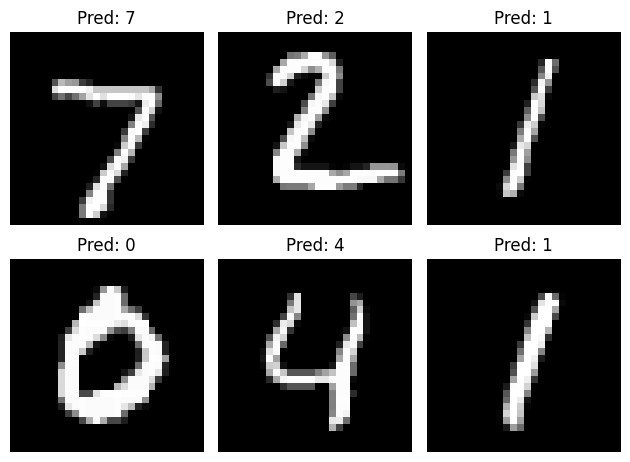

In [13]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)
pred = torch.argmax(output, dim=1)

# show 6 predictions
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Pred: {pred[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

📝 Exercise Day 5

1. Add 1 more conv layer (so 3).
2. Change the hidden layer size fc1 to 256.
3. Change the optimizer to SGD.

🧠 1. CNN Model with 3 Conv Layers & 256 Hidden Units

In [14]:
class CNNModelV2(nn.Module):
    def __init__(self):
        super(CNNModelV2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)   # 28x28
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 14x14
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # 7x7
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(64 * 3 * 3, 256)  # after 3 poolings → 3x3
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 28 → 14
        x = self.pool(F.relu(self.conv2(x)))  # 14 → 7
        x = self.pool(F.relu(self.conv3(x)))  # 7 → 3
        x = x.view(-1, 64 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

⚙️ 2. Train with SGD Optimizer

In [15]:
model = CNNModelV2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Training loop
for epoch in range(5):
    running_loss = 0.0
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")


Epoch 1, Loss: 0.4212
Epoch 2, Loss: 0.2198
Epoch 3, Loss: 0.3500
Epoch 4, Loss: 2.0734
Epoch 5, Loss: 2.3050


✅ 3. Evaluate Accuracy

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
